# Notebook for a controlled Bursting gene Chemical Reaction Network

Bursting Gene Chemical Reaction Network:

\begin{equation}
    \emptyset \xrightleftharpoons[\xi]{\theta_1} S_1 \quad
    S_1 \xrightarrow{\theta_2} S_1+S_2 \quad
    S_2 \xrightarrow{\theta_3} \emptyset
\end{equation}

In [1]:
import sys
sys.path.append('../')

import numpy as np
import torch
import matplotlib.pyplot as plt

import neuralnetwork
import convert_csv
import plot
import save_load_MDN
import training_pgd
import simulation

from CRN4_control import propensities_bursting_gene as propensities

## Importing data

In [2]:
FILE_NAME = 'data'
CRN_NAME = 'controlled_bg'
NUM_PARAMS = 7

In [3]:
# loading data
X_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train1.csv')
X_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train2.csv')
X_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train3.csv')

y_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train1.csv')
y_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train2.csv')
y_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train3.csv')

X_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid1.csv')
X_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid2.csv')
X_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid3.csv')

y_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid1.csv')
y_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid2.csv')
y_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid3.csv')

X_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_test.csv')
y_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_test.csv')

train_data1 = [X_train1, y_train1]
valid_data1 = [X_valid1, y_valid1]
train_data2 = [X_train2, y_train2]
valid_data2 = [X_valid2, y_valid2]
train_data3 = [X_train3, y_train3]
valid_data3 = [X_valid3, y_valid3]

## Hyperparameters

In [4]:
LR = 0.005
N_ITER = 700
N_HIDDEN = 128
BATCHSIZE = 32
MIXTURE = 'NB'
N_COMPS = 4

## Training models

We train 3 different models to compare their accuracy.

In [5]:
model1 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=N_HIDDEN, mixture=MIXTURE)
model2 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=N_HIDDEN, mixture=MIXTURE)
model3 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=N_HIDDEN, mixture=MIXTURE)

Mixture Density Network created.
Mixture Density Network created.
Mixture Density Network created.


In [6]:
train_losses1, valid_losses1 = neuralnetwork.train_NN(model1, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)
train_losses2, valid_losses2 = neuralnetwork.train_NN(model2, train_data2, valid_data2, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)
train_losses3, valid_losses3 = neuralnetwork.train_NN(model3, train_data3, valid_data3, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)

Training ...: 100%|█████████▉| 699/700 [26:53<00:02,  2.31s/it]


Learning rate: 2.5177519986929707e-08,
Train loss: 0.0008746866951696575,
 Valid loss: 0.0009114354616031051


Training ...: 100%|█████████▉| 699/700 [31:19<00:02,  2.69s/it]


Learning rate: 2.5177519986929707e-08,
Train loss: 0.0008430646848864853,
 Valid loss: 0.0008377252379432321


Training ...: 100%|█████████▉| 699/700 [30:56<00:02,  2.66s/it]

Learning rate: 2.5177519986929707e-08,
Train loss: 0.000844088033773005,
 Valid loss: 0.0008394132019020617


In [11]:
for i, model in enumerate([model1, model2, model3]):
    save_load_MDN.save_MDN_model(model, f'controlled_BG_model{i+1}.pt')

## Loading models

In [5]:
model1 = save_load_MDN.load_MDN_model('saved_models/controlled_BG_model1.pt')
model2 = save_load_MDN.load_MDN_model('saved_models/controlled_BG_model2.pt')
model3 = save_load_MDN.load_MDN_model('saved_models/controlled_BG_model3.pt')

Mixture Density Network created.
Mixture Density Network created.
Mixture Density Network created.


In [6]:
# Compute losses

print("Model 1")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model1, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model1, loss=neuralnetwork.loss_hellinger)}')

print("Model 2")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model2, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model2, loss=neuralnetwork.loss_hellinger)}')

print("Model 3")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_hellinger)}')


Model 1
KLD : 0.0009744386188685894
Hellinger : 0.014159342274069786
Model 2
KLD : 0.0009031827794387937
Hellinger : 0.013765959069132805
Model 3
KLD : 0.0009370129555463791
Hellinger : 0.014034893363714218


## Probability mass function


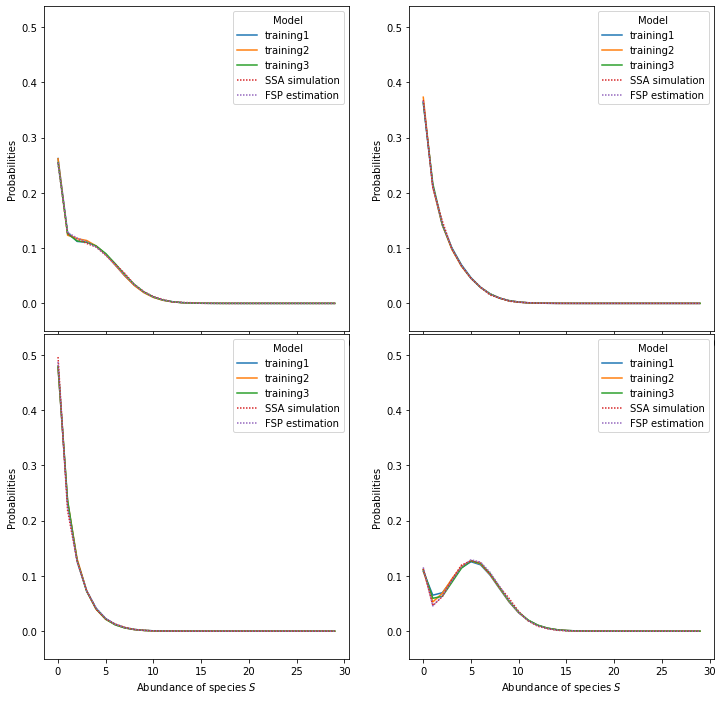

In [7]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound = 4*[30], 
                    time_windows = np.array([5, 10, 15, 20]),
                    n_comps=N_COMPS,
                    plot_test_result=(True, [y_test[1_000+k,:] for k in range(4)]), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    None,
                                    50, 
                                    propensities.init_state, 
                                    1, 
                                    3, 
                                    1))

## Sensitivity of the likelihood

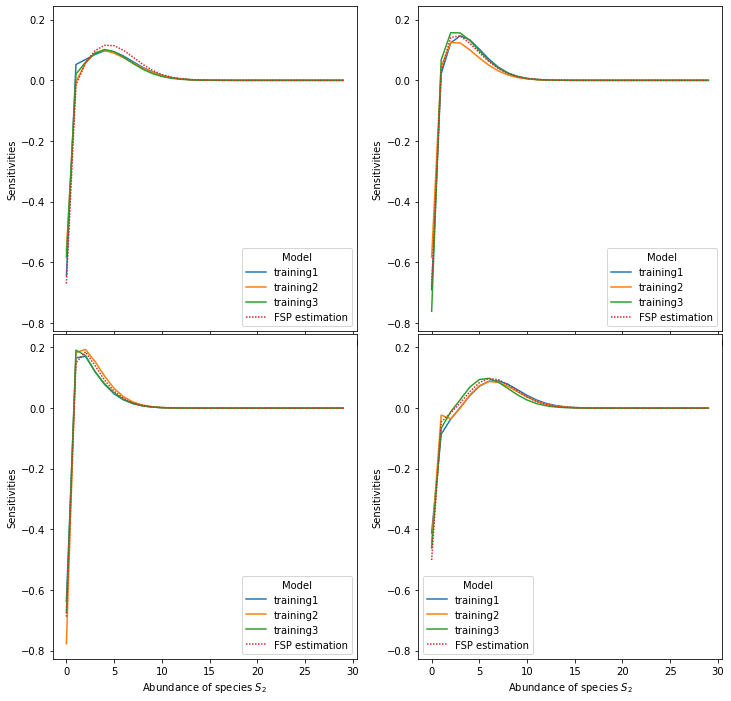

In [8]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=[30]*4, 
                    time_windows=np.array([5, 10, 15, 20]),
                    n_comps=N_COMPS,
                    plot=('sensitivities', 0), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    None,
                                    50, 
                                    propensities.init_state, 
                                    1, 
                                    3, 
                                    1),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN4_theta1.pdf'))

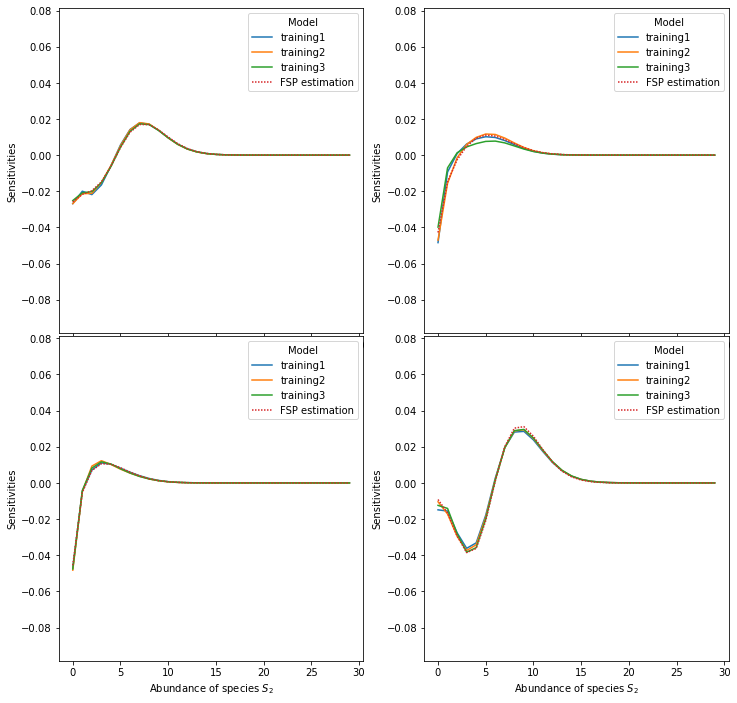

In [9]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=[30]*4, 
                    time_windows=np.array([5, 10, 15, 20]),
                    n_comps=N_COMPS,
                    plot=('sensitivities', 1), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    None,
                                    50, 
                                    propensities.init_state, 
                                    1, 
                                    3, 
                                    1),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN4_theta2.pdf'))

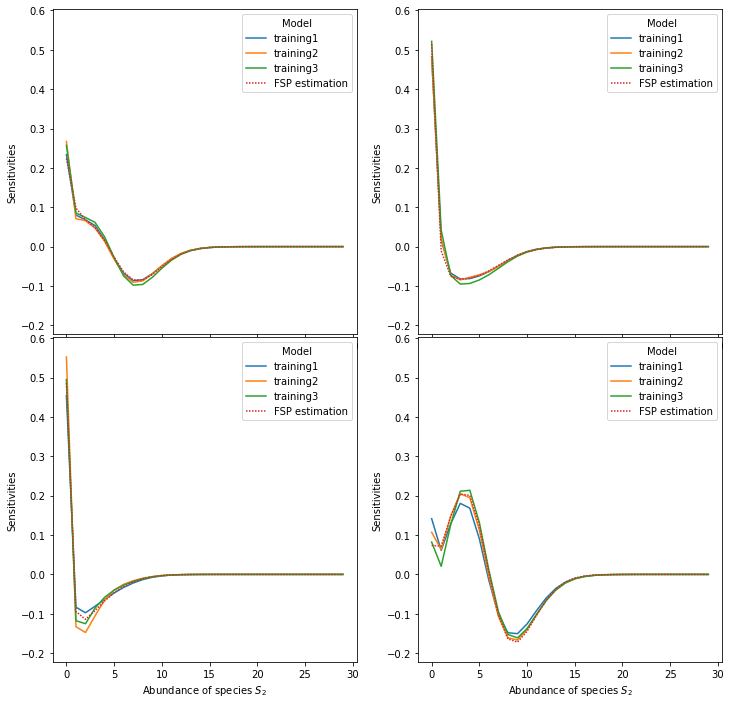

In [10]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=[30]*4, 
                    time_windows=np.array([5, 10, 15, 20]),
                    n_comps=N_COMPS,
                    plot=('sensitivities', 2), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    None,
                                    50, 
                                    propensities.init_state, 
                                    1, 
                                    3, 
                                    1),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN4_theta3.pdf'))

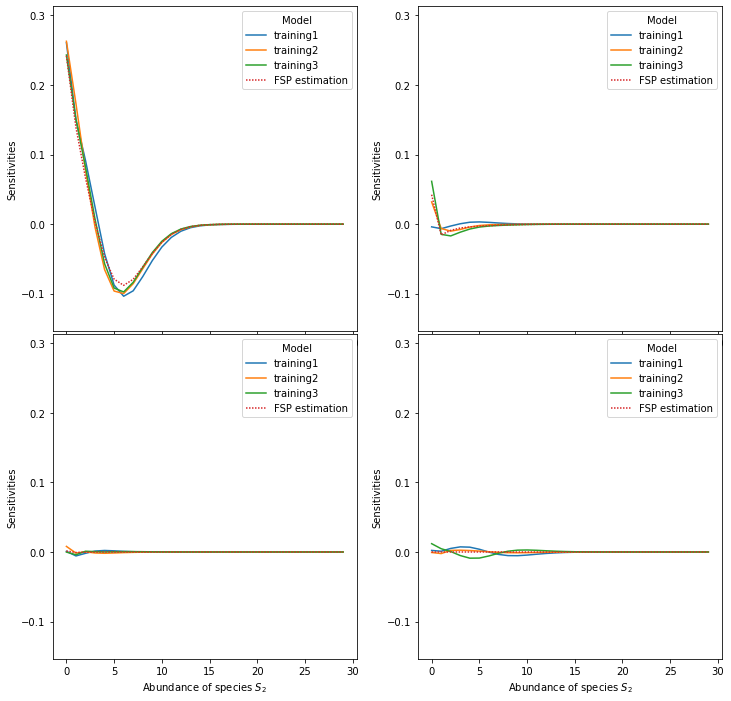

In [11]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=[30]*4, 
                    time_windows=np.array([5, 10, 15, 20]),
                    n_comps=N_COMPS,
                    plot=('sensitivities', 3), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    None,
                                    50, 
                                    propensities.init_state, 
                                    1, 
                                    3, 
                                    1),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN4_xi1.pdf'))

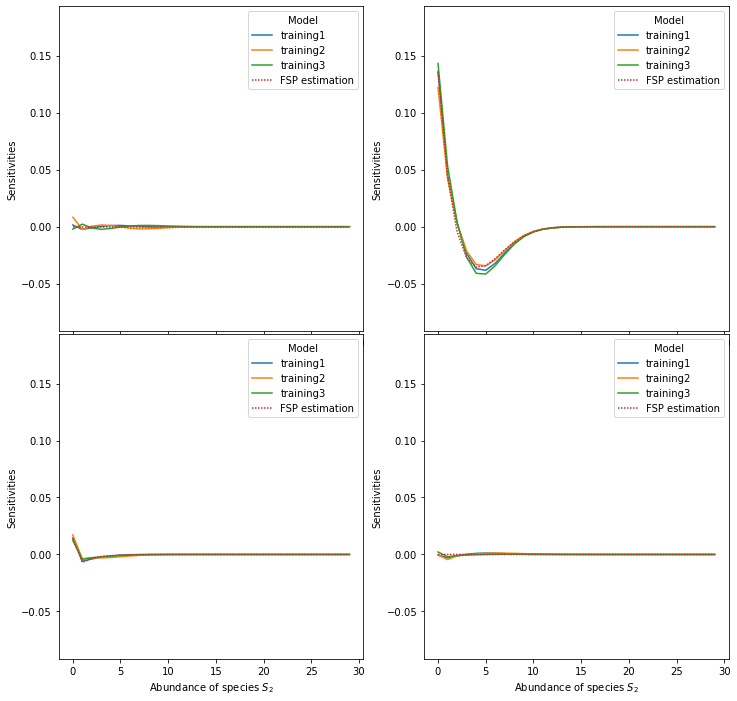

In [12]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=[30]*4, 
                    time_windows=np.array([5, 10, 15, 20]),
                    n_comps=N_COMPS,
                    plot=('sensitivities', 4), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    None,
                                    50, 
                                    propensities.init_state, 
                                    1, 
                                    3, 
                                    1),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN4_xi2.pdf'))

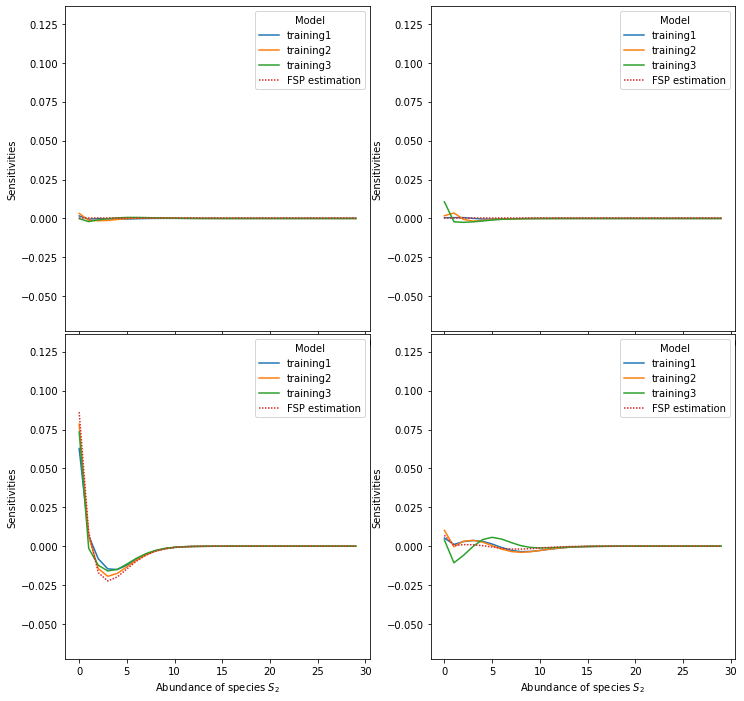

In [13]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=[30]*4, 
                    time_windows=np.array([5, 10, 15, 20]),
                    n_comps=N_COMPS,
                    plot=('sensitivities', 5), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    None,
                                    50, 
                                    propensities.init_state, 
                                    1, 
                                    3, 
                                    1),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN4_xi3.pdf'))

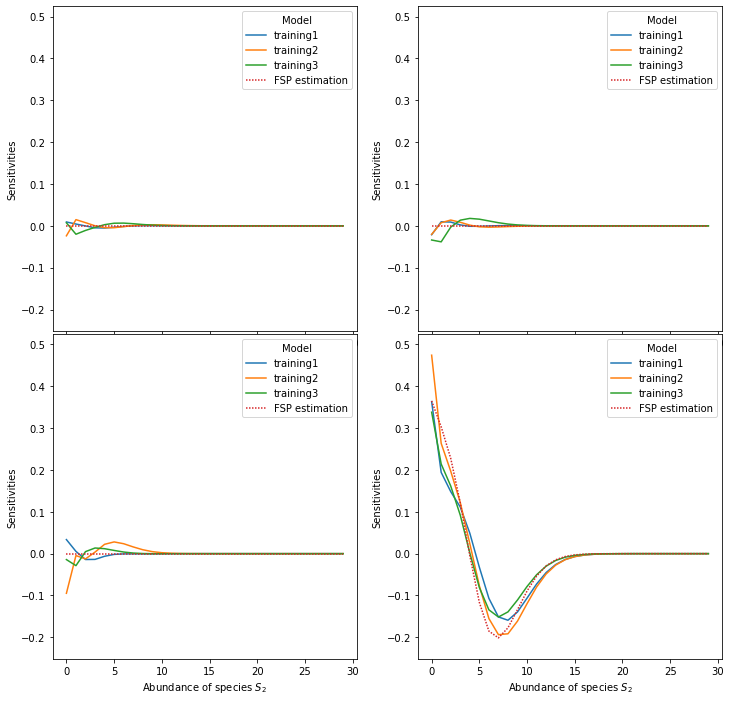

In [14]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=[30]*4, 
                    time_windows=np.array([5, 10, 15, 20]),
                    n_comps=N_COMPS,
                    plot=('sensitivities', 6), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    None,
                                    50, 
                                    propensities.init_state, 
                                    1, 
                                    3, 
                                    1),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN4_xi4.pdf'))

## Fisher information

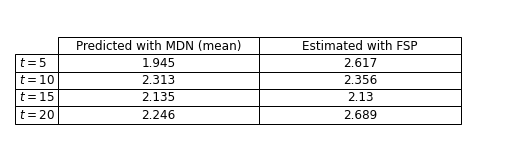

In [15]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=0,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            1, 
                            3, 
                            1),
            up_bound=200)

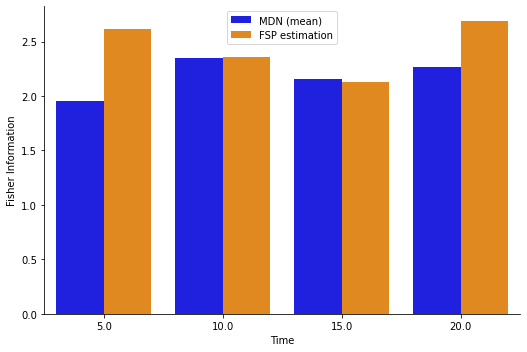

In [16]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=0,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            1, 
                            3, 
                            1),
            up_bound=200,
            colors=['blue', 'darkorange', 'forestgreen'])

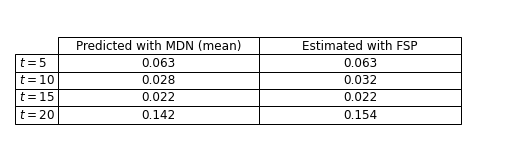

In [17]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=1,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            1, 
                            3, 
                            1),
            up_bound=200)

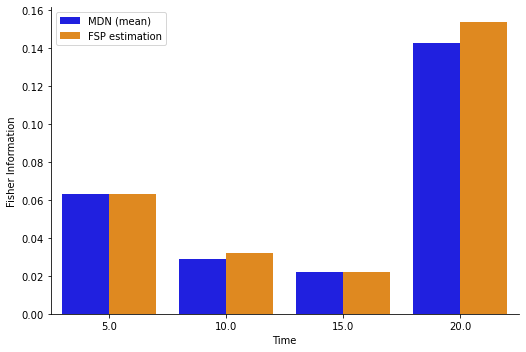

In [18]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=1,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            1, 
                            3, 
                            1),
            up_bound=200,
            colors=['blue', 'darkorange', 'forestgreen'])

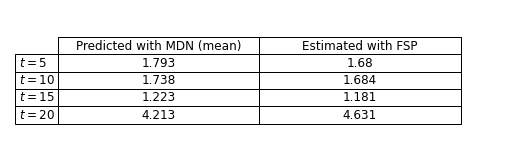

In [19]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=2,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            1, 
                            3, 
                            1),
            up_bound=200)

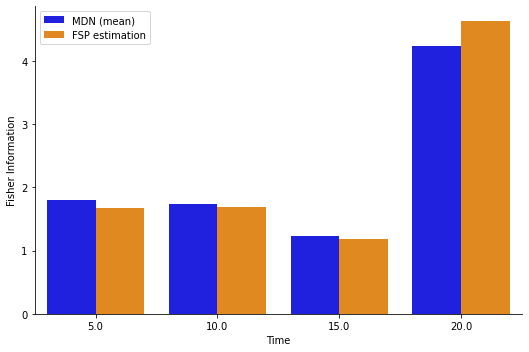

In [20]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=2,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            1, 
                            3, 
                            1),
            up_bound=200,
            colors=['blue', 'darkorange', 'forestgreen'])

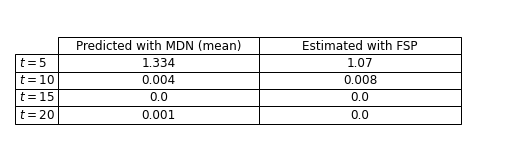

In [21]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=3,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            1, 
                            3, 
                            1),
            up_bound=200)

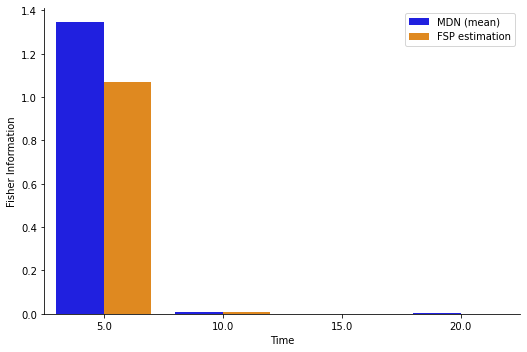

In [22]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=3,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            1, 
                            3, 
                            1),
            up_bound=200,
            colors=['blue', 'darkorange', 'forestgreen'])

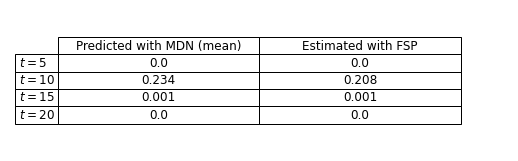

In [23]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=4,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            1, 
                            3, 
                            1),
            up_bound=200)

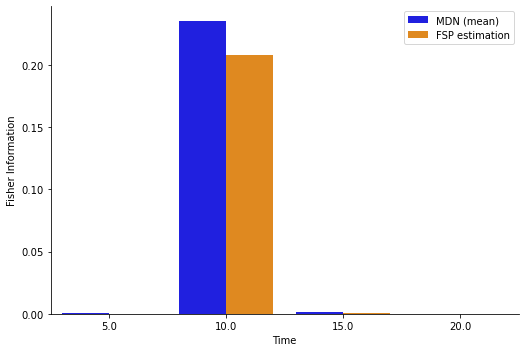

In [24]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=4,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            1, 
                            3, 
                            1),
            up_bound=200,
            colors=['blue', 'darkorange', 'forestgreen'])

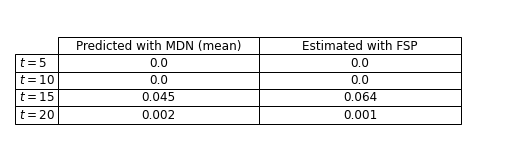

In [25]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=5,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            1, 
                            3, 
                            1),
            up_bound=200)

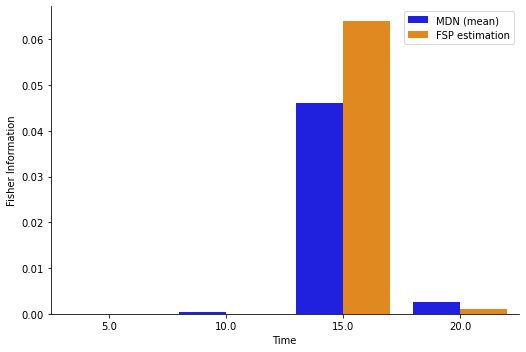

In [26]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=5,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            1, 
                            3, 
                            1),
            up_bound=200,
            colors=['blue', 'darkorange', 'forestgreen'])

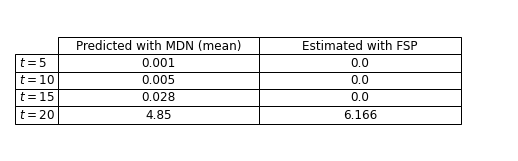

In [27]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=6,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            1, 
                            3, 
                            1),
            up_bound=200)

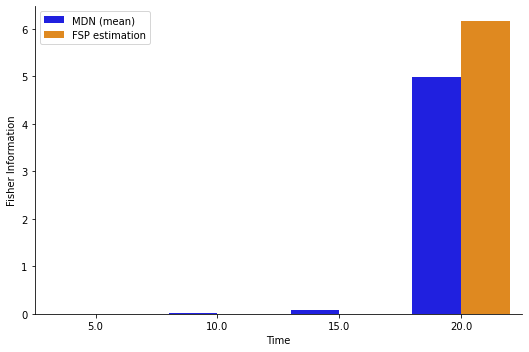

In [28]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            ind_param=6,
            time_windows = np.array([5, 10, 15, 20]),
            models = (True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            1, 
                            3, 
                            1),
            up_bound=200,
            colors=['blue', 'darkorange', 'forestgreen'])

## Expectation

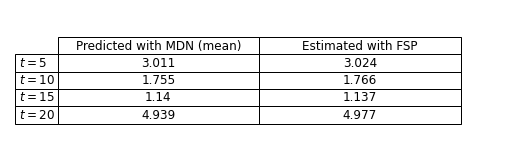

In [29]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            3, 
                            1),
            up_bound=200,
            save=(False, 'CRN4_expval_tab.pdf'))

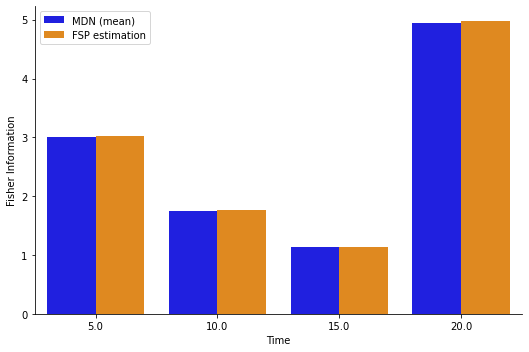

In [30]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(),
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            3, 
                            1),
            up_bound=200,
            save=(False, 'CRN4_expval_bars.pdf'))

## Gradient of expectation

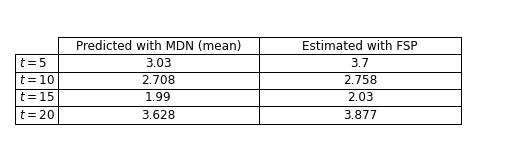

In [31]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            3, 
                            1),
            plot=('gradient', 0),
            up_bound=200,
            save=(False, 'CRN4_expgrad1_tab.pdf'))

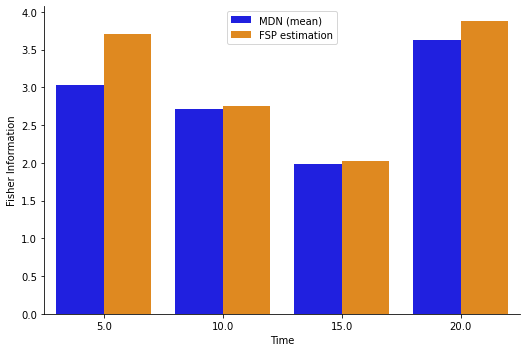

In [32]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(),
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            3, 
                            1),
            plot=('gradient', 0),
            up_bound=200,
            save=(False, 'CRN4_expgrad1_bars.pdf'))

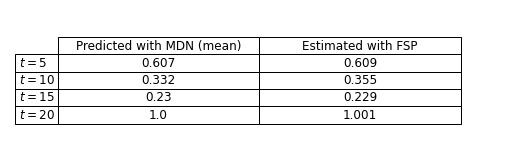

In [33]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            3, 
                            1),
            plot=('gradient', 1),
            up_bound=200,
            save=(False, 'CRN4_expgrad2_tab.pdf'))

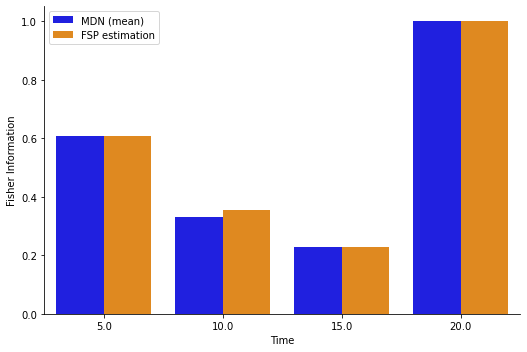

In [34]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(),
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            3, 
                            1),
            plot=('gradient', 1),
            up_bound=200,
            save=(False, 'CRN4_expgrad2_bars.pdf'))

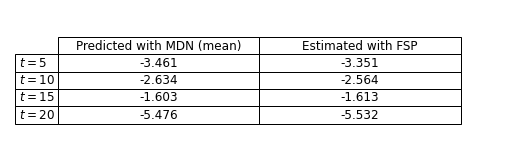

In [35]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            3, 
                            1),
            plot=('gradient', 2),
            up_bound=200,
            save=(False, 'CRN4_expgrad3_tab.pdf'))

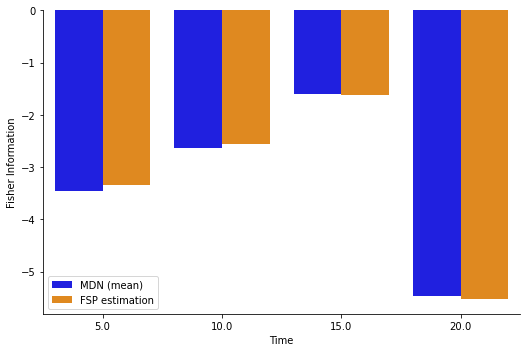

In [36]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(),
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            3, 
                            1),
            plot=('gradient', 2),
            up_bound=200,
            save=(False, 'CRN4_expgrad3_bars.pdf'))

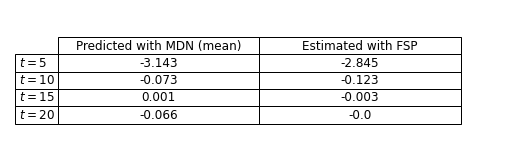

In [37]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            3, 
                            1),
            plot=('gradient', 3),
            up_bound=200,
            save=(False, 'CRN4_expgrad4_tab.pdf'))

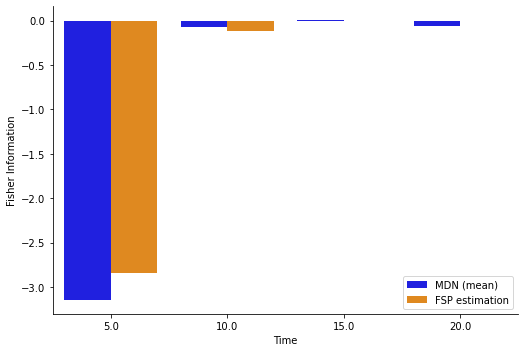

In [38]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(),
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            3, 
                            1),
            plot=('gradient', 3),
            up_bound=200,
            save=(False, 'CRN4_expgrad4_bars.pdf'))

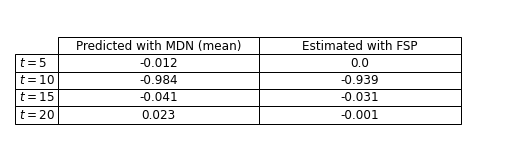

In [39]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            3, 
                            1),
            plot=('gradient', 4),
            up_bound=200,
            save=(False, 'CRN4_expgrad5_tab.pdf'))

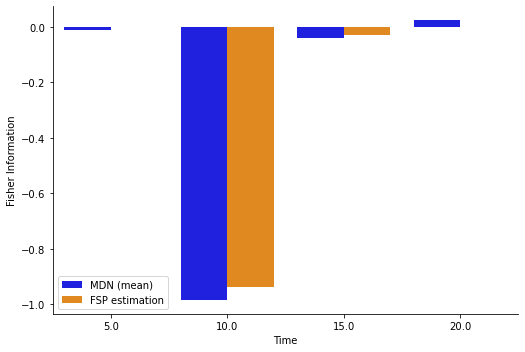

In [40]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(),
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            propensities.propensities_drv,
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            3, 
                            1),
            plot=('gradient', 4),
            up_bound=200,
            save=(False, 'CRN4_expgrad5_bars.pdf'))

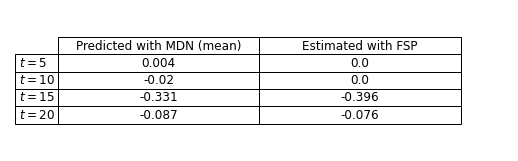

In [41]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            3, 
                            1),
            plot=('gradient', 5),
            up_bound=200,
            save=(False, 'CRN4_expgrad6_tab.pdf'))

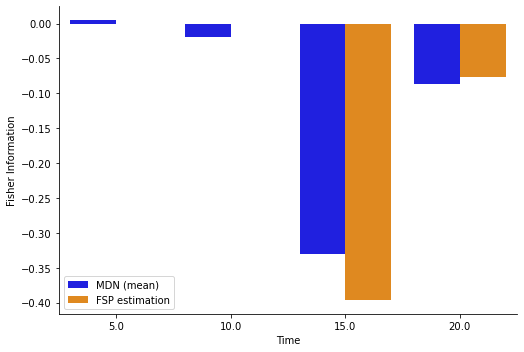

In [42]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(),
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            3, 
                            1),
            plot=('gradient', 5),
            up_bound=200,
            save=(False, 'CRN4_expgrad6_bars.pdf'))

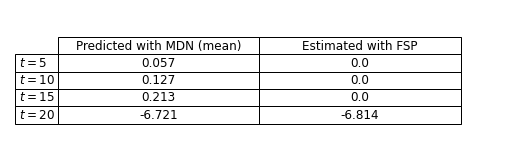

In [43]:
plot.expect_val_table(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(), 
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            3, 
                            1),
            plot=('gradient', 6),
            up_bound=200,
            save=(False, 'CRN4_expgrad7_tab.pdf'))

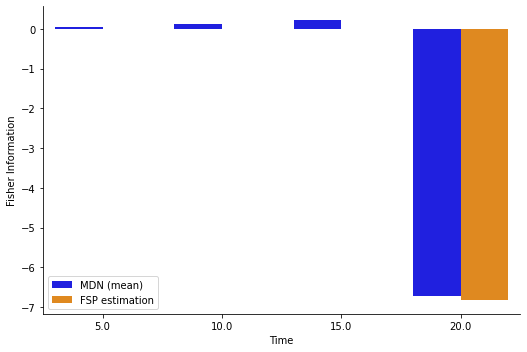

In [44]:
plot.expect_val_barplots(time_samples=np.array([5, 10, 15, 20]), 
            params=X_test[1_000,1:].numpy(),
            time_windows=np.array([5, 10, 15, 20]),
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            3, 
                            1),
            plot=('gradient', 6),
            up_bound=200,
            save=(False, 'CRN4_expgrad7_bars.pdf'))

## Stochastic control of the Chemical Reaction Network

In [6]:
def loss05(x):
    return (x-0.5)**2

def loss1(x):
    return (x-1)**2

def loss1_5(x):
    return (x-1.5)**2

def loss1_75(x):
    return (x-1.75)**2

In [11]:
crn = simulation.CRN(stoichiometry_mat=propensities.stoich_mat, 
                    propensities=propensities.propensities,
                    propensities_drv=None, 
                    init_state=propensities.init_state, 
                    n_fixed_params=3, 
                    n_control_params=1)
domain=np.stack([np.array([1e-10, 5.])]*4)
fixed_params=np.array([1., 2., 1.])
time_windows=np.array([5, 10, 15, 20])

### Constant targets

Optimizing...
Time:  370.97403502464294
Number of iterations:  26887
Control parameters:  [3.08065964 2.81450303 2.77165718 3.03353895]
Final loss:  2.2979403269118848e-07


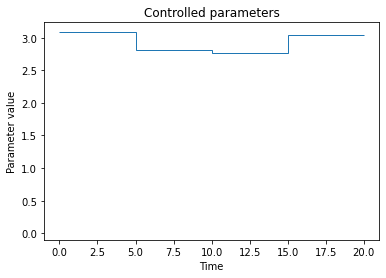

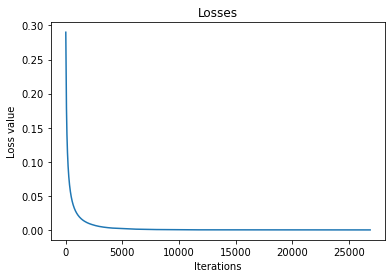

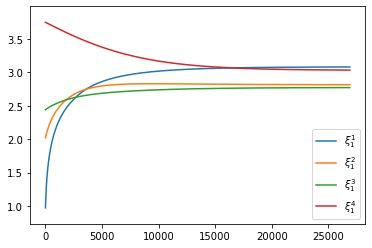

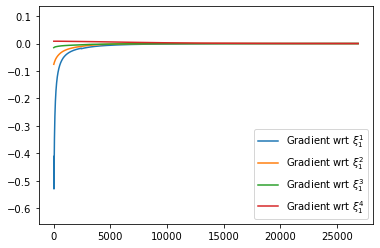

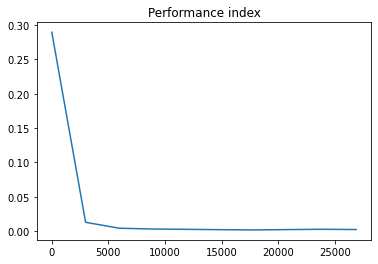

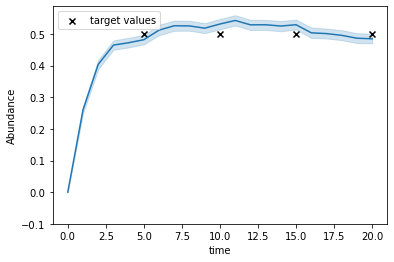

In [24]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=loss05,
                    gamma=0.01,
                    n_iter=30_000,
                    eps=1e-8,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 0.5], [10., 0.5], [15., 0.5], [20., 0.5]]),
                    crn_name='ctrl_bg',
                    directory="gradient_descent/MDN/constant_targets/target05/",
                    save=(True, ['gradient_descent/MDN/constant_targets/target05/control_values', 
                                'gradient_descent/MDN/constant_targets/target05/experimental_losses', 
                                'gradient_descent/MDN/constant_targets/target05/parameters', 
                                'gradient_descent/MDN/constant_targets/target05/gradients_losses', 
                                'gradient_descent/MDN/constant_targets/target05/real_losses', 
                                'gradient_descent/MDN/constant_targets/target05/exp_results']))

Optimizing...
Time:  77.46655988693237
Number of iterations:  5428
Control parameters:  [0.97661958 0.98368419 1.00632667 0.97179829]
Final loss:  1.0870408573282475e-08


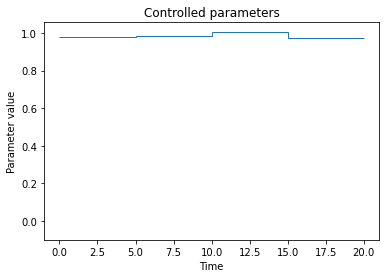

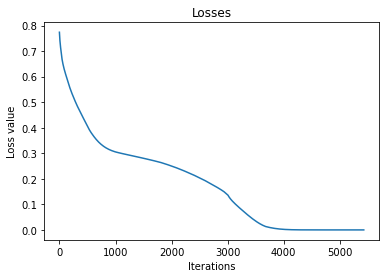

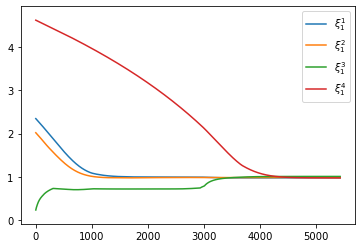

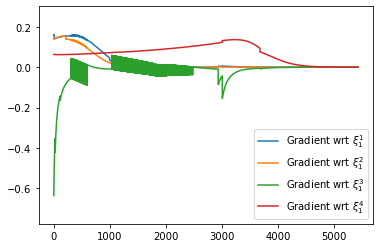

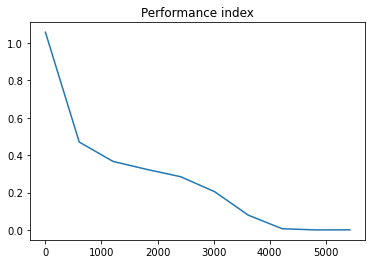

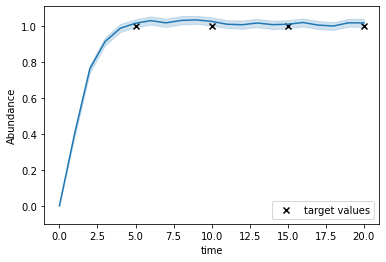

In [25]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=loss1,
                    gamma=0.01,
                    n_iter=30_000,
                    eps=1e-8,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 1.], [10., 1.], [15., 1.], [20., 1.]]),
                    crn_name='ctrl_bg',
                    directory="gradient_descent/MDN/constant_targets/target1/",
                    save=(True, ['gradient_descent/MDN/constant_targets/target1/control_values', 
                                'gradient_descent/MDN/constant_targets/target1/experimental_losses', 
                                'gradient_descent/MDN/constant_targets/target1/parameters', 
                                'gradient_descent/MDN/constant_targets/target1/gradients_losses', 
                                'gradient_descent/MDN/constant_targets/target1/real_losses', 
                                'gradient_descent/MDN/constant_targets/target1/exp_results']))

Optimizing...
Time:  10.932953834533691
Number of iterations:  916
Control parameters:  [0.20440227 0.35598442 0.3499678  0.40303112]
Final loss:  2.226073547717533e-09


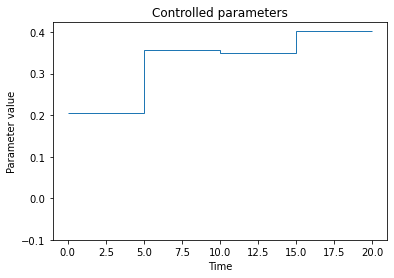

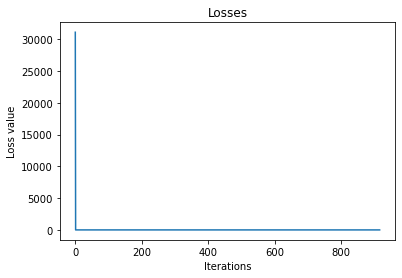

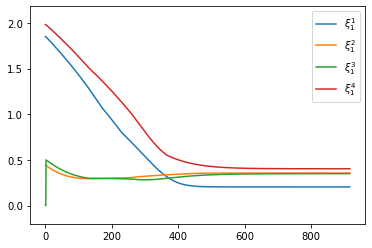

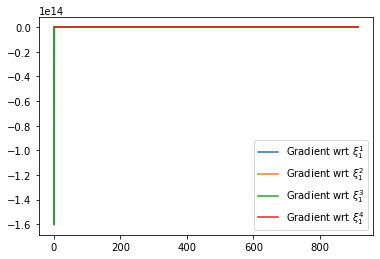

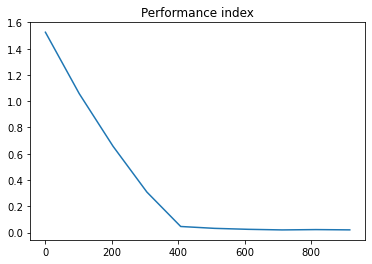

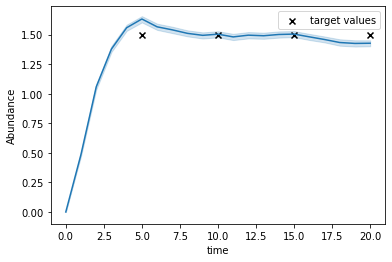

In [26]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=loss1_5,
                    gamma=0.01,
                    n_iter=30_000,
                    eps=1e-8,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 1.5], [10., 1.5], [15., 1.5], [20., 1.5]]),
                    crn_name='ctrl_bg',
                    directory="gradient_descent/MDN/constant_targets/target15/",
                    save=(True, ['gradient_descent/MDN/constant_targets/target15/control_values', 
                                'gradient_descent/MDN/constant_targets/target15/experimental_losses', 
                                'gradient_descent/MDN/constant_targets/target15/parameters', 
                                'gradient_descent/MDN/constant_targets/target15/gradients_losses', 
                                'gradient_descent/MDN/constant_targets/target15/real_losses', 
                                'gradient_descent/MDN/constant_targets/target15/exp_results']))

Optimizing...
Time:  607.9032549858093
Number of iterations:  50000
Control parameters:  [0.02172176 0.22498652 0.19168845 0.24200367]
Final loss:  0.00621218169135318


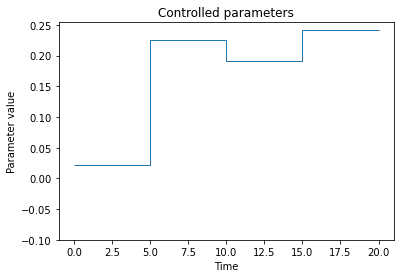

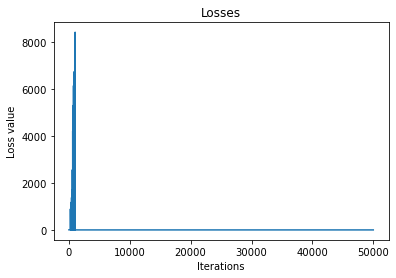

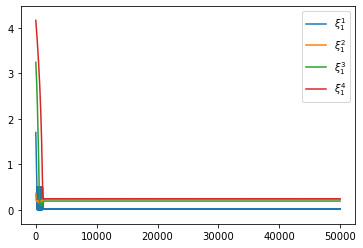

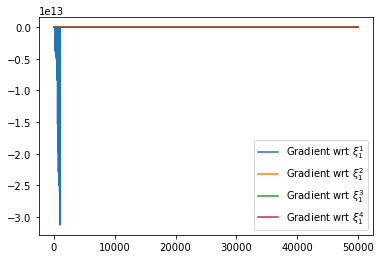

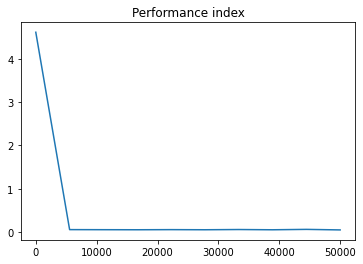

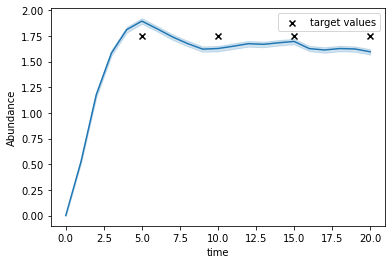

In [28]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=loss1_75,
                    gamma=0.01,
                    n_iter=50_000,
                    eps=1e-8,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 1.75], [10., 1.75], [15., 1.75], [20., 1.75]]),
                    crn_name='ctrl_bg',
                    directory="gradient_descent/MDN/constant_targets/target175/",
                    save=(True, ['gradient_descent/MDN/constant_targets/target175/control_values', 
                                'gradient_descent/MDN/constant_targets/target175/experimental_losses', 
                                'gradient_descent/MDN/constant_targets/target175/parameters', 
                                'gradient_descent/MDN/constant_targets/target175/gradients_losses', 
                                'gradient_descent/MDN/constant_targets/target175/real_losses', 
                                'gradient_descent/MDN/constant_targets/target175/exp_results']))

Optimizing...
Time:  260.5223779678345
Number of iterations:  22549
Control parameters:  [3.03519138 0.82599587 0.21390651 0.13032754]
Final loss:  2.2871876126373536e-07


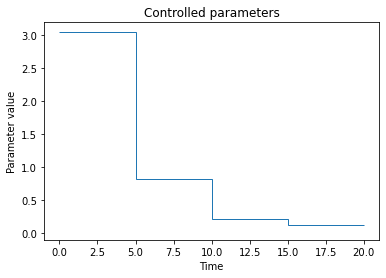

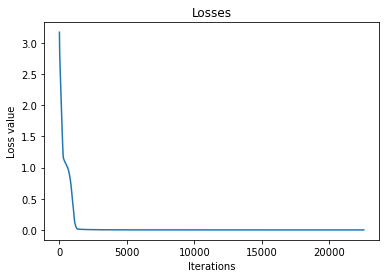

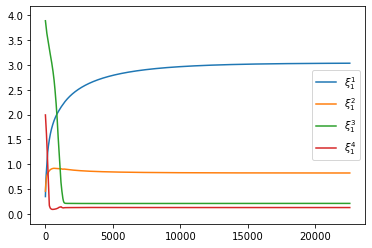

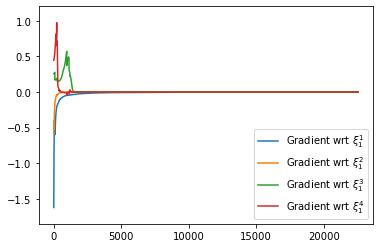

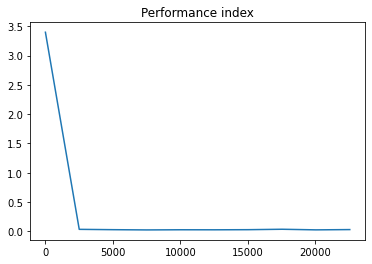

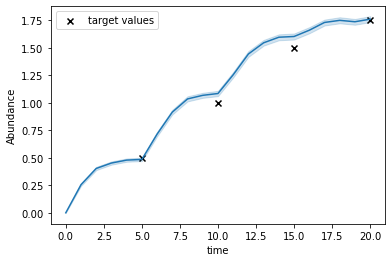

In [30]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=[loss05, loss1, loss1_5, loss1_75],
                    gamma=0.01,
                    n_iter=30_000,
                    eps=1e-8,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 0.5], [10., 1], [15., 1.5], [20., 1.75]]),
                    crn_name='ctrl_bg',
                    directory="gradient_descent/MDN/varying_targets/target5115175/",
                    save=(True, ['gradient_descent/MDN/varying_targets/target5115175/control_values', 
                                'gradient_descent/MDN/varying_targets/target5115175/experimental_losses', 
                                'gradient_descent/MDN/varying_targets/target5115175/parameters', 
                                'gradient_descent/MDN/varying_targets/target5115175/gradients_losses', 
                                'gradient_descent/MDN/varying_targets/target5115175/real_losses', 
                                'gradient_descent/MDN/varying_targets/target5115175/exp_results']))

Optimizing...
Time:  419.8315260410309
Number of iterations:  30000
Control parameters:  [0.02716034 0.49167197 1.20061637 3.52608575]
Final loss:  4.257628916093381e-07


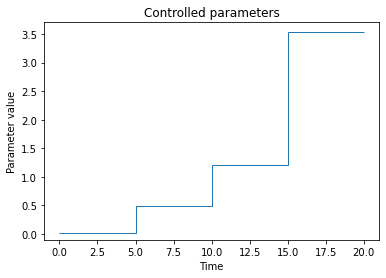

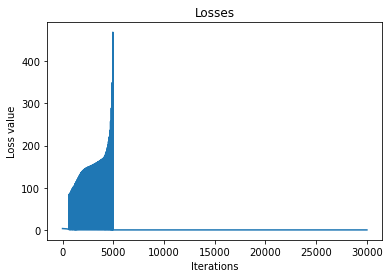

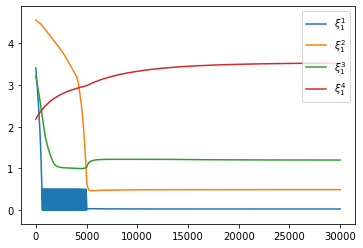

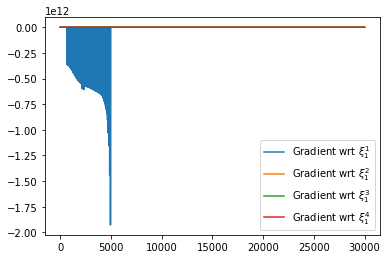

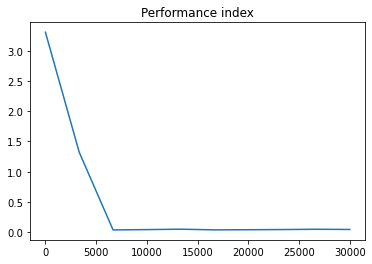

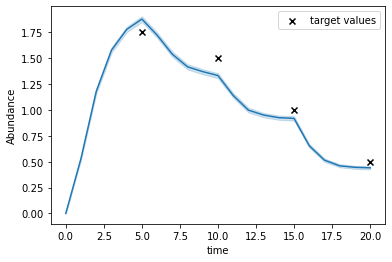

In [31]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=[loss1_75, loss1_5, loss1, loss05],
                    gamma=0.01,
                    n_iter=30_000,
                    eps=1e-8,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 1.75], [10., 1.5], [15., 1.], [20., 0.5]]),
                    crn_name='ctrl_bg',
                    directory="gradient_descent/MDN/varying_targets/target5115175/",
                    save=(True, ['gradient_descent/MDN/varying_targets/target5115175/control_values', 
                                'gradient_descent/MDN/varying_targets/target5115175/experimental_losses', 
                                'gradient_descent/MDN/varying_targets/target5115175/parameters', 
                                'gradient_descent/MDN/varying_targets/target5115175/gradients_losses', 
                                'gradient_descent/MDN/varying_targets/target5115175/real_losses', 
                                'gradient_descent/MDN/varying_targets/target5115175/exp_results']))

Optimizing...
Time:  423.5599858760834
Number of iterations:  30000
Control parameters:  [0.21223952 4.829038   0.19857088 3.37577319]
Final loss:  0.0018704451339681682


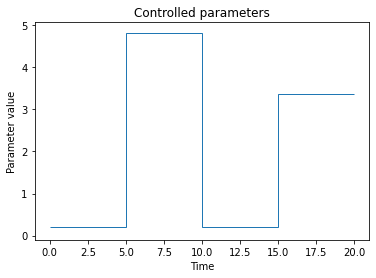

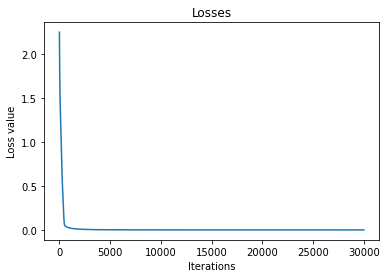

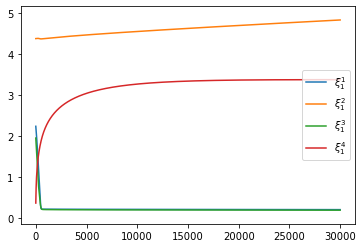

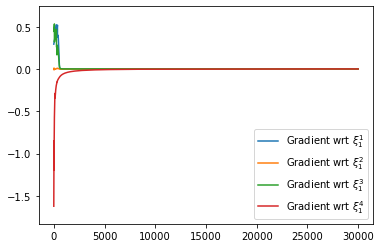

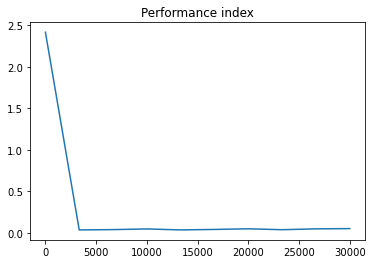

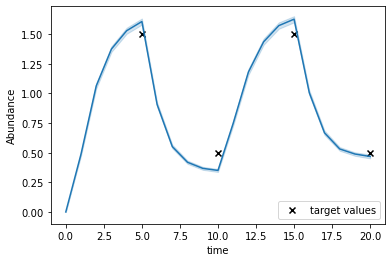

In [32]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=[loss1_5, loss05, loss1_5, loss05],
                    gamma=0.01,
                    n_iter=30_000,
                    eps=1e-8,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 1.5], [10., 0.5], [15., 1.5], [20., 0.5]]),
                    crn_name='ctrl_bg',
                    directory="gradient_descent/MDN/varying_targets/target15051505/",
                    save=(True, ['gradient_descent/MDN/varying_targets/target15051505/control_values', 
                                'gradient_descent/MDN/varying_targets/target15051505/experimental_losses', 
                                'gradient_descent/MDN/varying_targets/target15051505/parameters', 
                                'gradient_descent/MDN/varying_targets/target15051505/gradients_losses', 
                                'gradient_descent/MDN/varying_targets/target15051505/real_losses', 
                                'gradient_descent/MDN/varying_targets/target15051505/exp_results']))

Optimizing...
Time:  399.7954411506653
Number of iterations:  30000
Control parameters:  [3.19382264 0.89137161 0.99022581 0.29990109]
Final loss:  8.629478884358832e-06


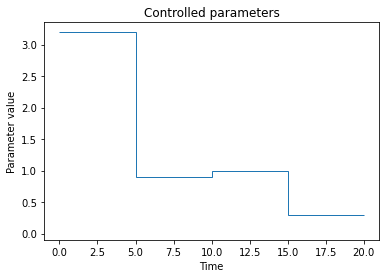

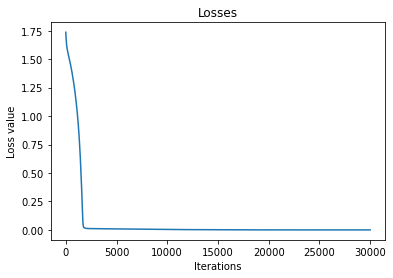

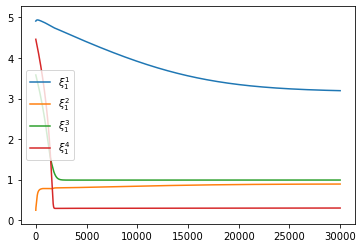

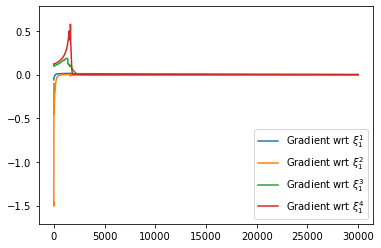

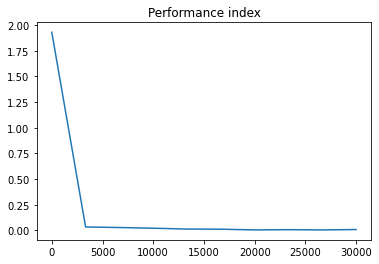

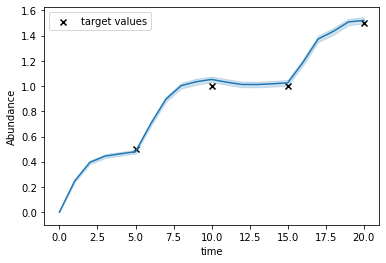

In [33]:
training_pgd.pgdMDN(crn=crn,
                    model=model2,
                    domain=domain,
                    fixed_params=fixed_params,
                    time_windows=time_windows,
                    loss=[loss05, loss1, loss1, loss1_5],
                    gamma=0.01,
                    n_iter=30_000,
                    eps=1e-8,
                    ind_species=propensities.ind_species,
                    targets=np.array([[5., 0.5], [10., 1.], [15., 1.], [20., 1.5]]),
                    crn_name='ctrl_bg',
                    directory="gradient_descent/MDN/varying_targets/target051115/",
                    save=(True, ['gradient_descent/MDN/varying_targets/target051115/control_values', 
                                'gradient_descent/MDN/varying_targets/target051115/experimental_losses', 
                                'gradient_descent/MDN/varying_targets/target051115/parameters', 
                                'gradient_descent/MDN/varying_targets/target051115/gradients_losses', 
                                'gradient_descent/MDN/varying_targets/target051115/real_losses', 
                                'gradient_descent/MDN/varying_targets/target051115/exp_results']))